In [94]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn import grid_search
from sklearn import cross_validation
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid") 
from IPython.display import display
from IPython.core.pylabtools import getfigs

In [2]:
# useful links ---
# accuracy with cv - http://scikit-learn.org/stable/modules/cross_validation.html


In [32]:
saveas_path = '/Users/jamie/insight_data/figures/'

In [4]:
%matplotlib qt

In [5]:
X_df = pd.read_pickle('new_X_df.save')
outcomes_df = pd.read_pickle('new_outcomes_df.save')

In [6]:
n_samples = np.shape(X_df)[0]
shuffle_i = np.random.permutation(n_samples)

In [13]:
X = X_df.ix[shuffle_i,:]
y = outcomes_df.ix[shuffle_i,'Outcome'].values
n_samples, n_features = X.shape

In [10]:
# from 2015_06_28 random forests grid search

# clf_grid.best_params_
# {'max_depth': 24,
#  'min_samples_leaf': 2,
#  'min_samples_split': 3,
#  'n_estimators': 1000}

#  clf_grid.best_score_
#  0.84805478902284193

In [12]:
from sklearn.externals import joblib
rf_best = joblib.load('rf_best_june28/rf_best.pkl') 

In [78]:

joblib.dump(rf_best, 'rf_best_june28/rf_best.pkl') 

['rf_best_june28/rf_best.pkl',
 'rf_best_june28/rf_best.pkl_01.npy',
 'rf_best_june28/rf_best.pkl_02.npy',
 'rf_best_june28/rf_best.pkl_03.npy',
 'rf_best_june28/rf_best.pkl_04.npy',
 'rf_best_june28/rf_best.pkl_05.npy',
 'rf_best_june28/rf_best.pkl_06.npy',
 'rf_best_june28/rf_best.pkl_07.npy',
 'rf_best_june28/rf_best.pkl_08.npy',
 'rf_best_june28/rf_best.pkl_09.npy',
 'rf_best_june28/rf_best.pkl_10.npy',
 'rf_best_june28/rf_best.pkl_11.npy',
 'rf_best_june28/rf_best.pkl_12.npy',
 'rf_best_june28/rf_best.pkl_13.npy',
 'rf_best_june28/rf_best.pkl_14.npy',
 'rf_best_june28/rf_best.pkl_15.npy',
 'rf_best_june28/rf_best.pkl_16.npy',
 'rf_best_june28/rf_best.pkl_17.npy',
 'rf_best_june28/rf_best.pkl_18.npy',
 'rf_best_june28/rf_best.pkl_19.npy',
 'rf_best_june28/rf_best.pkl_20.npy',
 'rf_best_june28/rf_best.pkl_21.npy',
 'rf_best_june28/rf_best.pkl_22.npy',
 'rf_best_june28/rf_best.pkl_23.npy',
 'rf_best_june28/rf_best.pkl_24.npy',
 'rf_best_june28/rf_best.pkl_25.npy',
 'rf_best_june28/rf

In [18]:
rf_best.get_params

<bound method RandomForestClassifier.get_params of RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=24, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=2, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)>

In [61]:
from calc_model_cv_metrics import *
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [51]:
plot_roc_with_cv(rf_best)

(115196,)


In [52]:
plt.gca().set_aspect('equal', adjustable='box')
plt.draw()

In [53]:
plt.savefig(saveas_path+'best rf cv auc_3f.png',bbox_inches='tight',dpi=400) 

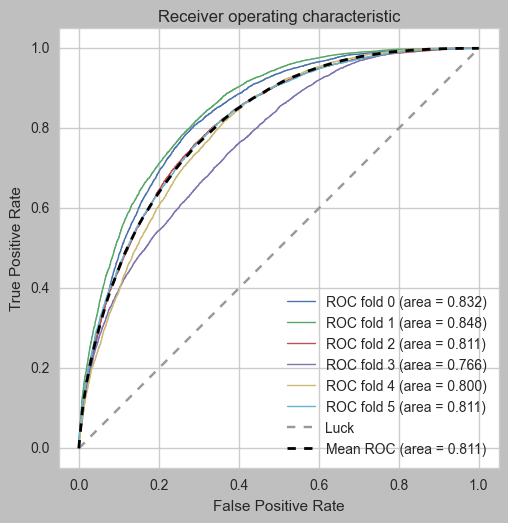

In [54]:
display(plt.gcf())

In [43]:
plt.close('all')

In [44]:
# now get cross validated accuracy, precision, recall, f1 score

In [48]:
scores = cross_validation.cross_val_score(rf_best, X, y, cv=5, n_jobs=-1, verbose=1)

[Parallel(n_jobs=-1)]: Done   1 out of   5 | elapsed:  3.7min remaining: 14.7min
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:  3.7min remaining:  2.5min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  3.7min finished


In [49]:
print "Accuracy: %0.3f (+/- %0.2f)" % (scores.mean(), scores.std() * 2)

Accuracy: 0.767 (+/- 0.01)


In [56]:
scores = cross_validation.cross_val_score(rf_best, X, y, \
                                          scoring='precision',cv=5, n_jobs=-1, verbose=1)
print "Precision: %0.3f (+/- %0.2f)" % (scores.mean(), scores.std() * 2)

[Parallel(n_jobs=-1)]: Done   1 out of   5 | elapsed:  3.8min remaining: 15.2min
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:  3.8min remaining:  2.5min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  3.8min finished


Precision: 0.726 (+/- 0.01)


In [58]:
scores = cross_validation.cross_val_score(rf_best, X, y, \
                                          scoring='recall',cv=5, n_jobs=-1, verbose=1)
print "Recall: %0.3f (+/- %0.2f)" % (scores.mean(), scores.std() * 2)

[Parallel(n_jobs=-1)]: Done   1 jobs       | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:  3.8min remaining:  2.6min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  3.9min finished


Recall: 0.700 (+/- 0.01)


In [59]:
scores = cross_validation.cross_val_score(rf_best, X, y, \
                                          scoring='f1',cv=5, n_jobs=-1, verbose=1)
print "F1: %0.3f (+/- %0.2f)" % (scores.mean(), scores.std() * 2)

[Parallel(n_jobs=-1)]: Done   1 jobs       | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:  3.9min remaining:  2.6min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  3.9min finished


F1: 0.713 (+/- 0.01)


In [69]:
X_df = pd.read_pickle('new_X_df.save')
X_cols = list(X_df.columns)
print X_cols

['Goal', 'Campaign_days', 'Title_n_words', 'Blurb_n_words', 'Has_video', 'N_rewards', 'Min_reward', 'Median_reward', 'Max_reward', 'Reward_ship_days', 'N_links', 'N_figs', 'Body_n_words', 'N_creator_backed', 'N_creator_created', 'art', 'comics', 'crafts', 'dance', 'design', 'fashion', 'film', 'food', 'games', 'journalism', 'music', 'photography', 'publishing', 'technology', 'theater', 'Ships_intn', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']


In [87]:
X_cols_nice = np.array(['Goal', 'Campaign days', 'Title n words', 'Blurbn words', 'Has video',\
               'N rewards', 'Min reward', 'Median reward', 'Max reward', 'Reward ship days',\
               'N links', 'N figs', 'Body n words', 'N campaigns creator backed',\
               'N campaigns creator created', 'Art', 'Comics', 'Crafts', 'Dance', 'Design',\
               'Fashion', 'Film', 'Food', 'Games', 'Journalism', 'Music', 'Photography', 'Publishing',\
               'Technology', 'Theater', 'International ship', 'Monday launch', 'Tuesday launch',\
               'Wednesday launch', 'Thursday launch', 'Friday launch', 'Saturday launch', 'Sunday launch'])

In [88]:
print X_cols_nice

['Goal' 'Campaign days' 'Title n words' 'Blurbn words' 'Has video'
 'N rewards' 'Min reward' 'Median reward' 'Max reward' 'Reward ship days'
 'N links' 'N figs' 'Body n words' 'N campaigns creator backed'
 'N campaigns creator created' 'Art' 'Comics' 'Crafts' 'Dance' 'Design'
 'Fashion' 'Film' 'Food' 'Games' 'Journalism' 'Music' 'Photography'
 'Publishing' 'Technology' 'Theater' 'International ship' 'Monday launch'
 'Tuesday launch' 'Wednesday launch' 'Thursday launch' 'Friday launch'
 'Saturday launch' 'Sunday launch']


In [99]:
sns.set_style("whitegrid")
plot_feature_importances(rf_best.feature_importances_,X_cols_nice,len(X_cols_nice))

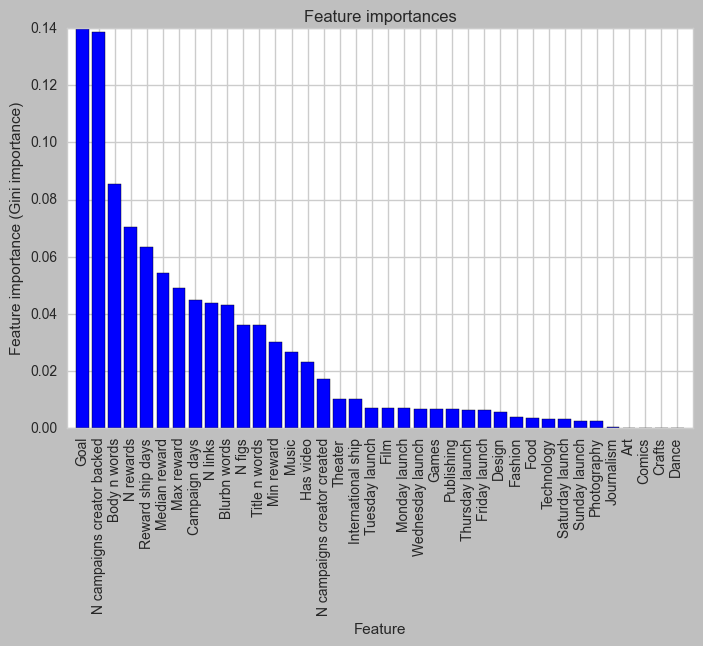

In [100]:
display(plt.gcf())